<a href="https://colab.research.google.com/github/SomsakST/NewsCluesApp/blob/main/CNN_MobileNetV2_IncepsionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="rlFd7RgoBqjv6eoTKCKo")
project = rf.workspace("test-xszsk").project("thai-food-ewynu")
version = project.version(2)
dataset = version.download("folder")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Thai-Food-2 in folder:: 100%|██████████| 724/724 [00:00<00:00, 5204.89it/s]


In [5]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# กำหนดที่อยู่ของไดเรกทอรีฝึก ทดสอบ และตรวจสอบความถูกต้อง
train_dir = "/content/Thai-Food-2/train"
test_dir = "/content/Thai-Food-2/test"
valid_dir = "/content/Thai-Food-2/valid"

# กำหนดขนาดรูปภาพและขนาดชุดข้อมูล
image_size = (150, 150)
batch_size = 20

# สร้างชุดข้อมูลฝึก
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# สร้างชุดข้อมูลทดสอบ
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# สร้างชุดข้อมูลตรวจสอบความถูกต้อง
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# สร้าง generator สำหรับฝึกโมเดล
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

# สร้าง generator สำหรับทดสอบโมเดล
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

# สร้าง generator สำหรับตรวจสอบความถูกต้อง
valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

# สร้างและฝึกโมเดล CNN
model_cnn = Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_cnn.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=10,
          validation_data=valid_generator,
          validation_steps=len(valid_generator))

# สร้างและฝึกโมเดล MobileNetV2
base_model_mobilenet = MobileNetV2(input_shape=(150, 150, 3),
                                   include_top=False,
                                   weights='imagenet')
base_model_mobilenet.trainable = False

model_mobilenet = Sequential([
    base_model_mobilenet,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

model_mobilenet.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

model_mobilenet.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=valid_generator,
                    validation_steps=len(valid_generator))

# สร้างและฝึกโมเดล InceptionV3
base_model_inception = InceptionV3(input_shape=(150, 150, 3),
                                   include_top=False,
                                   weights='imagenet')
base_model_inception.trainable = False

model_inception = Sequential([
    base_model_inception,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

model_inception.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

model_inception.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=10,
                    validation_data=valid_generator,
                    validation_steps=len(valid_generator))


Found 621 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Found 59 images belonging to 3 classes.
Epoch 1/10
32/32 [==============================] - 37s 1s/step - loss: 0.8815 - accuracy: 0.5942 - val_loss: 0.7825 - val_accuracy: 0.5932
Epoch 2/10
32/32 [==============================] - 32s 1s/step - loss: 0.9162 - accuracy: 0.5475 - val_loss: 0.6541 - val_accuracy: 0.7966
Epoch 3/10
32/32 [==============================] - 33s 1s/step - loss: 0.6333 - accuracy: 0.7407 - val_loss: 0.5395 - val_accuracy: 0.7627
Epoch 4/10
32/32 [==============================] - 32s 1s/step - loss: 0.6229 - accuracy: 0.7359 - val_loss: 0.8861 - val_accuracy: 0.5424
Epoch 5/10
32/32 [==============================] - 32s 988ms/step - loss: 0.5435 - accuracy: 0.7890 - val_loss: 0.5278 - val_accuracy: 0.7966
Epoch 6/10
32/32 [==============================] - 32s 992ms/step - loss: 0.2703 - accuracy: 0.9066 - val_loss: 0.5554 - val_accuracy: 0.7458
Epoch 7/10
32/32 [===============

9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
32/32 [==============================] - 16s 398ms/step - loss: 0.6047 - accuracy: 0.8003 - val_loss: 0.2739 - val_accuracy: 0.8983
Epoch 2/10
32/32 [==============================] - 12s 370ms/step - loss: 0.0750 - accuracy: 0.9758 - val_loss: 0.1379 - val_accuracy: 0.9322
Epoch 3/10
32/32 [==============================] - 12s 384ms/step - loss: 0.0261 - accuracy: 0.9968 - val_loss: 0.1506 - val_accuracy: 0.9322
Epoch 4/10
32/32 [==============================] - 12s 369ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.1380 - val_accuracy: 0.9661
Epoch 5/10
32/32 [==============================] - 12s 377ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.1314 - val_accuracy: 0.9661
Epoch 6/10
32/32 [==============================] - 12s 375ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.1428 - val_accuracy: 0.9661
Epoch 7/10
32/32 [==============================] - 11s 339ms/step - loss: 0.00

2/2 - 0s - loss: 1.4334 - accuracy: 0.7000 - 430ms/epoch - 215ms/step

CNN Test accuracy: 0.699999988079071
2/2 - 0s - loss: 0.0294 - accuracy: 1.0000 - 483ms/epoch - 242ms/step

MobileNetV2 Test accuracy: 1.0
2/2 - 1s - loss: 0.2584 - accuracy: 0.9000 - 1s/epoch - 624ms/step

InceptionV3 Test accuracy: 0.8999999761581421
2/2 [==============================] - 2s 730ms/step
CNN Confusion Matrix:
[[7 4 2]
 [5 1 3]
 [5 1 2]]
MobileNetV2 Confusion Matrix:
[[4 5 4]
 [5 1 3]
 [4 3 1]]
InceptionV3 Confusion Matrix:
[[4 3 6]
 [4 3 2]
 [6 1 1]]
CNN Classification Report:
               precision    recall  f1-score   support

    KaoManGai       0.41      0.54      0.47        13
StewedPorkLeg       0.17      0.11      0.13         9
  TomYumGoong       0.29      0.25      0.27         8

     accuracy                           0.33        30
    macro avg       0.29      0.30      0.29        30
 weighted avg       0.30      0.33      0.31        30

MobileNetV2 Classification Report:
       

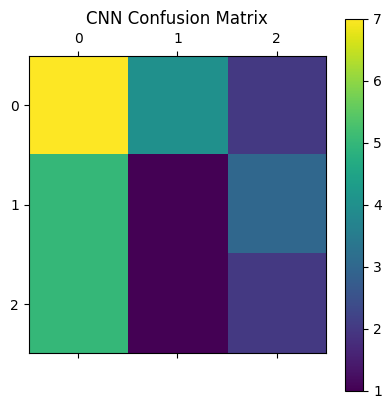

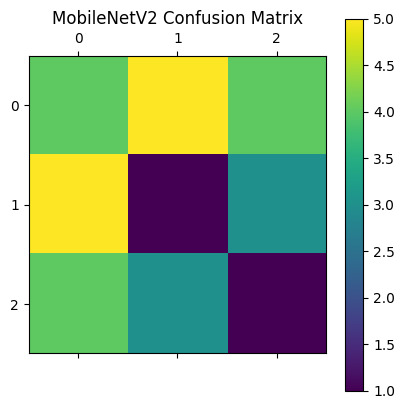

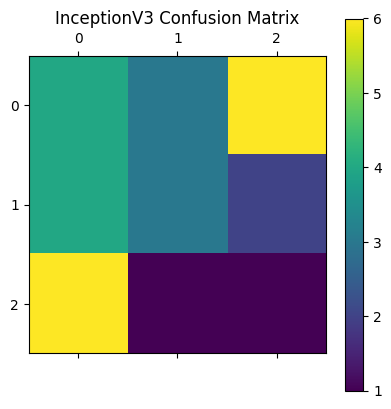

In [8]:
# Get class labels
class_labels = list(test_generator.class_indices.keys())

# ประเมินความแม่นยำของโมเดล CNN
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_generator, verbose=2)
print('\nCNN Test accuracy:', test_acc_cnn)

# ประเมินความแม่นยำของโมเดล MobileNetV2
test_loss_mobilenet, test_acc_mobilenet = model_mobilenet.evaluate(test_generator, verbose=2)
print('\nMobileNetV2 Test accuracy:', test_acc_mobilenet)

# ประเมินความแม่นยำของโมเดล InceptionV3
test_loss_inception, test_acc_inception = model_inception.evaluate(test_generator, verbose=2)
print('\nInceptionV3 Test accuracy:', test_acc_inception)

# ทำนายค่าที่ได้จากโมเดล CNN
y_pred_cnn = model_cnn.predict(test_generator)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)

# ทำนายค่าที่ได้จากโมเดล MobileNetV2
y_pred_mobilenet = model_mobilenet.predict(test_generator)
y_pred_classes_mobilenet = np.argmax(y_pred_mobilenet, axis=1)

# ทำนายค่าที่ได้จากโมเดล InceptionV3
y_pred_inception = model_inception.predict(test_generator)
y_pred_classes_inception = np.argmax(y_pred_inception, axis=1)

# Get true classes from test generator
true_classes = test_generator.classes

# Confusion matrix
conf_matrix_cnn = confusion_matrix(true_classes, y_pred_classes_cnn)
conf_matrix_mobilenet = confusion_matrix(true_classes, y_pred_classes_mobilenet)
conf_matrix_inception = confusion_matrix(true_classes, y_pred_classes_inception)
print("CNN Confusion Matrix:")
print(conf_matrix_cnn)
print("MobileNetV2 Confusion Matrix:")
print(conf_matrix_mobilenet)
print("InceptionV3 Confusion Matrix:")
print(conf_matrix_inception)

# Classification report
print("CNN Classification Report:")
print(classification_report(true_classes, y_pred_classes_cnn, target_names=class_labels))
print("MobileNetV2 Classification Report:")
print(classification_report(true_classes, y_pred_classes_mobilenet, target_names=class_labels))
print("InceptionV3 Classification Report:")
print(classification_report(true_classes, y_pred_classes_inception, target_names=class_labels))

# Plot confusion matrix
plt.matshow(conf_matrix_cnn)
plt.colorbar()
plt.title('CNN Confusion Matrix')
plt.show()

plt.matshow(conf_matrix_mobilenet)
plt.colorbar()
plt.title('MobileNetV2 Confusion Matrix')
plt.show()

plt.matshow(conf_matrix_inception)
plt.colorbar()
plt.title('InceptionV3 Confusion Matrix')
plt.show()


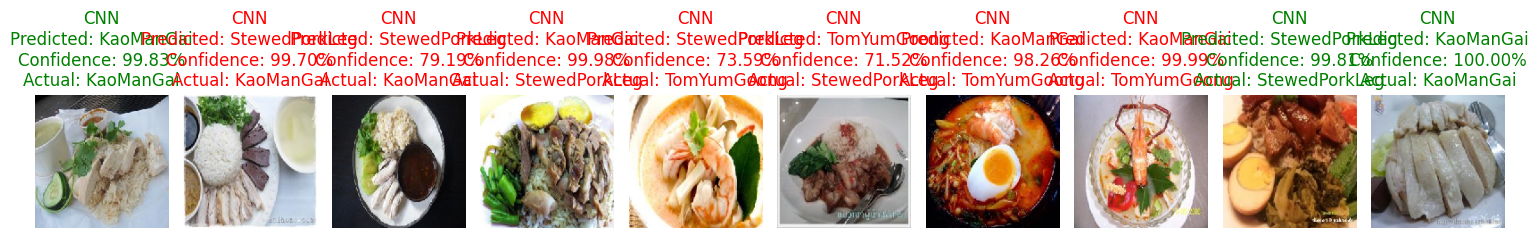

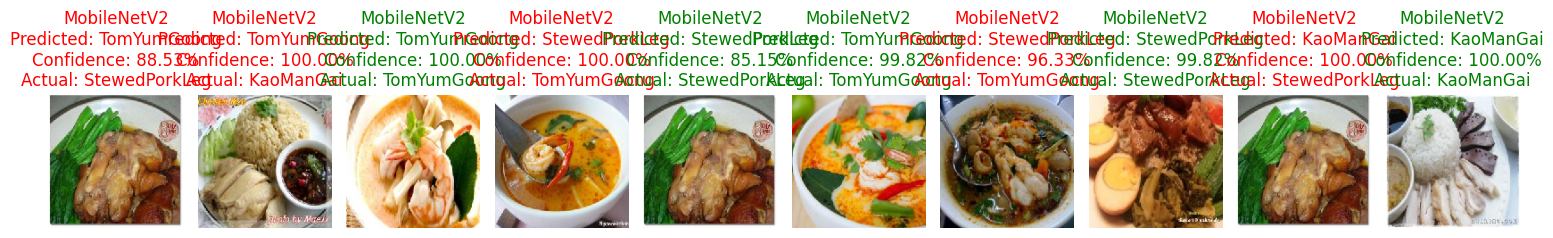

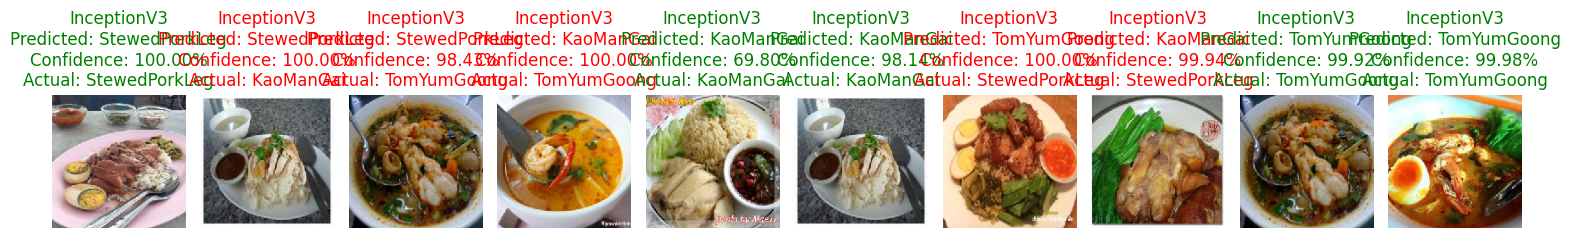

In [18]:
# Plot images with predicted labels and confidence for CNN
plt.figure(figsize=(15, 10))
for i in range(10):
    images, labels = test_generator.next()
    predicted_label = np.argmax(y_pred_cnn[i])
    confidence = np.max(y_pred_cnn[i]) * 100
    actual_label = np.argmax(labels[0])
    plt.subplot(1, 10, i + 1)
    plt.imshow(images[0])
    plt.axis('off')
    plt.title("CNN\nPredicted: {}\nConfidence: {:.2f}%\nActual: {}".format(
        class_labels[predicted_label],
        confidence,
        class_labels[actual_label]),
        color=("green" if predicted_label == actual_label else "red")
    )
    plt.tight_layout()

plt.show()

# Plot images with predicted labels and confidence for MobileNetV2
plt.figure(figsize=(15, 10))
for i in range(10):
    images, labels = test_generator.next()
    predicted_label = np.argmax(y_pred_mobilenet[i])
    confidence = np.max(y_pred_mobilenet[i]) * 100
    actual_label = np.argmax(labels[0])
    plt.subplot(1, 10, i + 1)
    plt.imshow(images[0])
    plt.axis('off')
    plt.title("MobileNetV2\nPredicted: {}\nConfidence: {:.2f}%\nActual: {}".format(
        class_labels[predicted_label],
        confidence,
        class_labels[actual_label]),
        color=("green" if predicted_label == actual_label else "red")
    )
    plt.tight_layout()

plt.show()

# Plot images with predicted labels and confidence for InceptionV3
plt.figure(figsize=(15, 10))
for i in range(10):
    images, labels = test_generator.next()
    predicted_label = np.argmax(y_pred_inception[i])
    confidence = np.max(y_pred_inception[i]) * 100
    actual_label = np.argmax(labels[0])
    plt.subplot(1, 10, i + 1)
    plt.imshow(images[0])
    plt.axis('off')
    plt.title("InceptionV3\nPredicted: {}\nConfidence: {:.2f}%\nActual: {}".format(
        class_labels[predicted_label],
        confidence,
        class_labels[actual_label]),
        color=("green" if predicted_label == actual_label else "red")
    )
    plt.tight_layout()

plt.show()
